## Machine Learning Midterm

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

### Part I
0. Read the **rating_final.csv** file into a dataframe. This data contains the ratings given by customers for different restaurants which are broken down into **food**, **service** and **overall** rating (just called **rating**).

In [2]:
ratings = pd.read_csv('rating_final.csv')
ratings.columns

Index(['userID', 'placeID', 'rating', 'food_rating', 'service_rating'], dtype='object')

In [3]:
ratings

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [4]:
ratings.food_rating.value_counts()

2    516
1    379
0    266
Name: food_rating, dtype: int64

In [5]:
ratings.rating.value_counts()

2    486
1    421
0    254
Name: rating, dtype: int64

In [6]:
ratings.service_rating.value_counts()

1    426
2    420
0    315
Name: service_rating, dtype: int64

In [7]:
ratings

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1




4. Build a linear model:
- Build a liniear model to explain the overall rating (target) **as a nominal categorical feature** in terms of the **ordinal** features: **food_rating** and **service_rating**. You need to decide whether you want to use logistic regression, Ridge, or Lasso from sklearn. Run **Grid Search** with **Cross-Validation** on your model to find the optimal penalty parameter in the range `np.logspace(-4, 4, 20)`.
- Report the best hyperparameter and your best cross-validation score.
- Report the performance in terms of a **confusion matrix**.

5. Bonus) What happens with the null model? Report its true target vs predicted target confusion matrix.

### Subquestion 1
1) How many distinct customers and distinct restaurants exist in this data? (4 pts)

In [8]:
#### Your answer here
# Number of distinct customers is
print(len(set(ratings['userID'])))

# Number of distinct restaurants is
print(len(set(ratings['placeID'])))


138
130


### Subquestion 2

Visualize the distribution of the count of reviews the restaurants received. Visualize the distribution of the count of reviews users gave. (4 pts)

In [9]:
#### Your answer here
placeid  = ratings.groupby("placeID").count()[["rating"]]
placeid["placeid"] = placeid.index
placeid

,rating,placeid
placeID,,
132560,4,132560
132561,4,132561
132564,4,132564
132572,15,132572
132583,4,132583
...,...,...
135088,6,135088
135104,7,135104
135106,10,135106


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

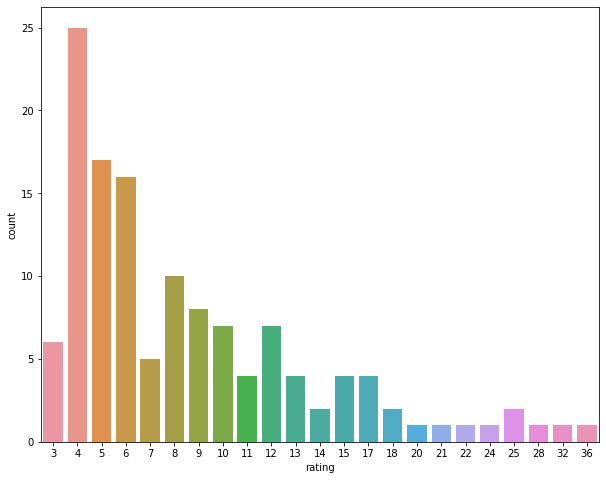

In [10]:
_, ax = plt.subplots(figsize=(10, 8))
sns.countplot(placeid.rating)

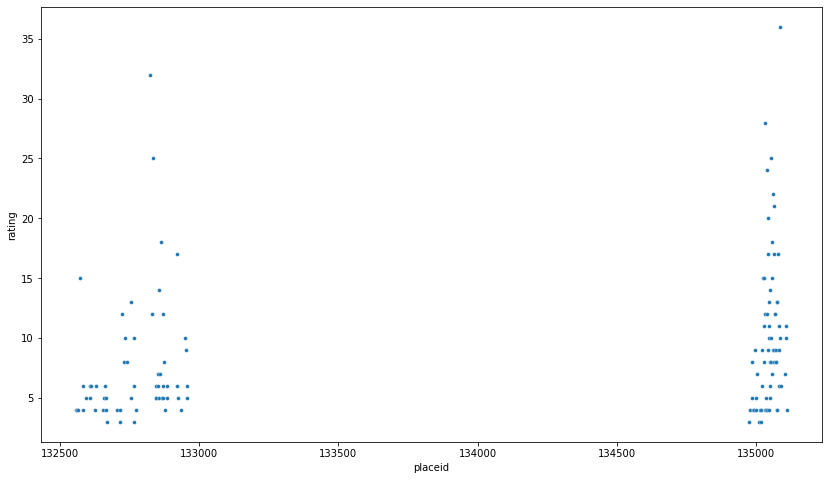

In [11]:
_, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x="placeid", y="rating", s=15, data=placeid);

In [12]:
userid  = ratings.groupby("userID").count()[["rating"]]
userid["userid"] = userid.index
userid

,rating,userid
userID,,
U1001,9,U1001
U1002,10,U1002
U1003,13,U1003
U1004,8,U1004
U1005,9,U1005
...,...,...
U1134,16,U1134
U1135,14,U1135
U1136,10,U1136


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

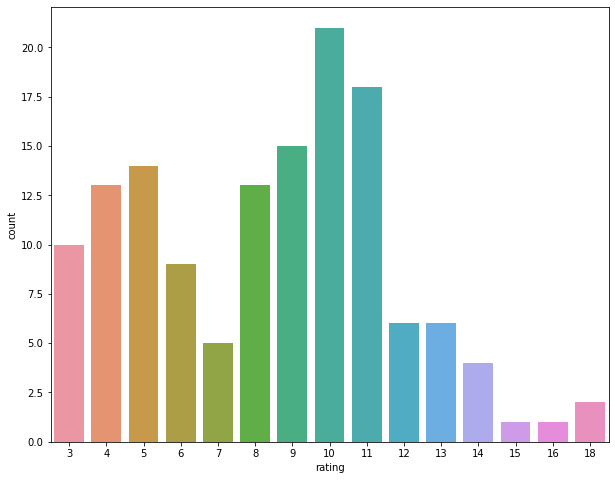

In [13]:
_, ax = plt.subplots(figsize=(10, 8))
sns.countplot(userid.rating)

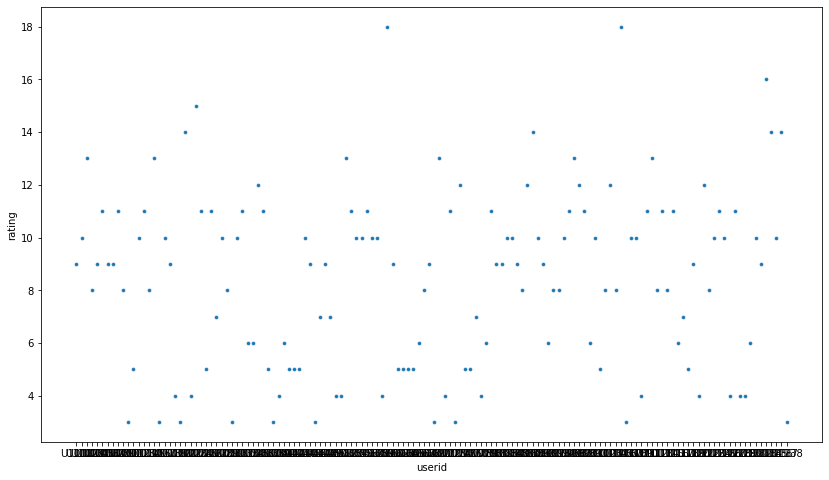

In [14]:
_, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x="userid", y="rating", s=15, data=userid);

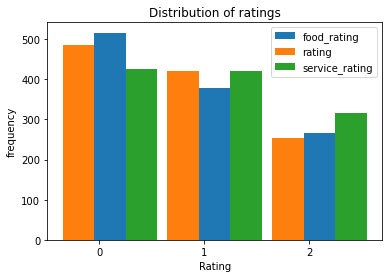

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = [0,1,2]
rat = list(ratings.rating.value_counts())
frat = list(ratings.food_rating.value_counts())
srat = list(ratings.service_rating.value_counts())
  
X_axis = np.arange(len(X))
  

plt.bar(X_axis + 0.1, frat, 0.3, label = 'food_rating')
plt.bar(X_axis - 0.2, rat, 0.3, label = 'rating')
plt.bar(X_axis + 0.4, srat, 0.3, label = 'service_rating')
  
plt.xticks(X_axis, X)
plt.xlabel("Rating")
plt.ylabel("frequency")
plt.title("Distribution of ratings")
plt.legend()
plt.show()

### Subquestion 3

Visualize the relationship between the count of reviews and the average rating received by each restaurant. Visualize the relationship between the count of reviews and the average rating given by each user. (4 pts)

In [16]:
#### Your answer here
avgrating_by_user = ratings.groupby("userID").mean()[["rating"]]
avgrating_by_user.rename(columns = {"rating": "rating_by_user"}, inplace=True)
avgrating_by_user

,rating_by_user
userID,
U1001,1.111111
U1002,1.400000
U1003,1.615385
U1004,1.875000
U1005,1.333333
...,...
U1134,1.437500
U1135,0.000000
U1136,1.600000


In [17]:
avgrating_by_restaurant = ratings.groupby("placeID").mean()[["rating"]]
avgrating_by_restaurant.rename(columns={"rating": "rating_by_place"}, inplace=True)

In [18]:
ratings = pd.merge(ratings, avgrating_by_user, how='left', left_on="userID", right_on ="userID")
ratings = pd.merge(ratings, avgrating_by_restaurant, how='left', left_on="placeID", right_on ="placeID")

In [19]:
plrc = ratings.groupby("placeID").count()
plrc.userID.value_counts().shape
plrm = ratings.groupby("placeID").mean()
plrm

,rating,food_rating,service_rating,rating_by_user,rating_by_place
placeID,,,,,
132560,0.500000,1.000000,0.250000,0.590278,0.500000
132561,0.750000,1.000000,1.000000,0.675000,0.750000
132564,1.250000,1.250000,1.500000,1.437500,1.250000
132572,1.000000,1.000000,0.933333,1.249016,1.000000
132583,1.000000,1.000000,1.250000,1.238095,1.000000
...,...,...,...,...,...
135088,1.000000,1.166667,1.000000,1.045833,1.000000
135104,0.857143,1.428571,0.857143,1.075000,0.857143
135106,1.200000,1.200000,1.200000,1.361554,1.200000


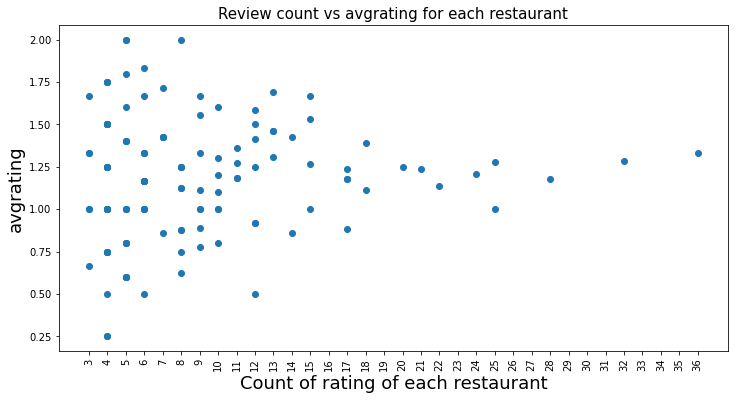

In [20]:
_, ax = plt.subplots(figsize=(12, 6))
plt.scatter(plrc.rating_by_place, plrm.rating)
plt.xticks(list(range(3,37)), list(range(3,37)))
ax.set_title("Review count vs avgrating for each restaurant", fontsize=15)
ax.set_xlabel("Count of rating of each restaurant", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("avgrating", fontsize=18);

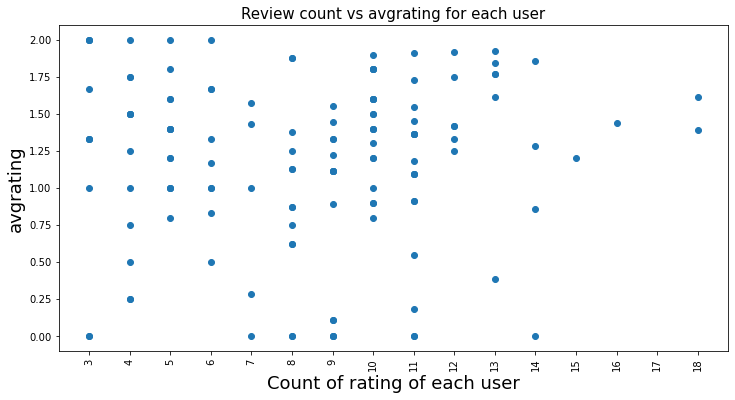

In [21]:
usrc = ratings.groupby("userID").count()
usrc.rating
usrm = ratings.groupby("userID").mean()
_, ax = plt.subplots(figsize=(12, 6))
plt.scatter(usrc.rating, usrm.rating)
plt.xticks(list(range(3,19)), list(range(3,19)))
ax.set_title("Review count vs avgrating for each user", fontsize=15)
ax.set_xlabel("Count of rating of each user", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("avgrating", fontsize=18);

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_15859/672839516.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


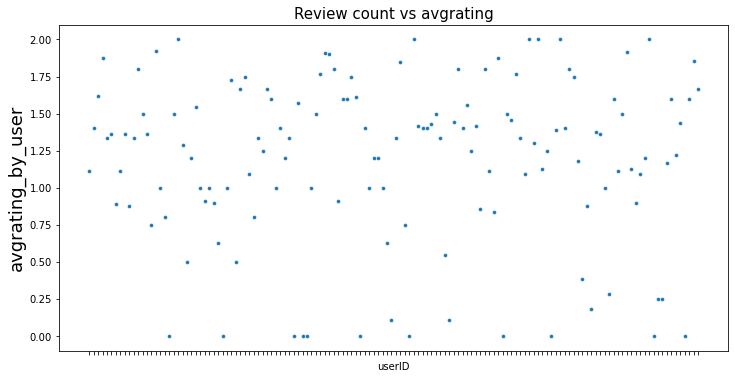

In [22]:
ratings.sort_values(by="userID", ascending=False, inplace=True)
ratings
_, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x="userID", y="rating_by_user", s=15, data=ratings.groupby("userID").mean());
ax.set_title("Review count vs avgrating", fontsize=15)
#ax.set_xlabel("userID", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("avgrating_by_user", fontsize=18);

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_15859/1231506941.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


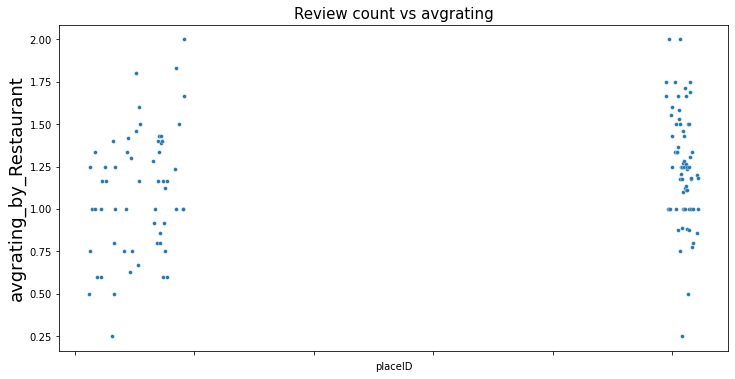

In [23]:
_, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x="placeID", y="rating_by_place", s=15, data=ratings.groupby("placeID").mean());
ax.set_title("Review count vs avgrating", fontsize=15)
#ax.set_xlabel("userID", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel("avgrating_by_Restaurant", fontsize=18);

### Subquestion 4

Build a linear model:
- Build a liniear model to explain the overall rating (target) **as a nominal categorical feature** in terms of the **ordinal** features: **food_rating** and **service_rating**. You need to decide whether you want to use logistic regression, Ridge, or Lasso from sklearn. Run **Grid Search** with **Cross-Validation** on your model to find the optimal penalty parameter in the range `np.logspace(-4, 4, 20)`. (6 pts)
- Report the best hyperparameter and your best cross-validation score. (2 pts)
- Report the performance in terms of a **confusion matrix**. (2 pts)

In [24]:
#### Your answer here
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(ratings[["food_rating", "service_rating"]], ratings["rating"], test_size=0.7, random_state=0)
ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.598277
--------------------------------------------------
R^2 for test  set: 0.595713


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print("R^2 for train set: %f" %clf.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %clf.score(X_test, y_test))

R^2 for train set: 0.750000
--------------------------------------------------
R^2 for test  set: 0.729397


In [27]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-4,4,20), "penalty":["l1","l2",'elasticnet']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.03359818286283781, 'penalty': 'l2'}
accuracy : 0.7505882352941178


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py"

In [28]:
logreg2=LogisticRegression(C=0.03359818286283781,penalty="l2")
logreg2.fit(X_train,y_train)
print("R^2 for train set: %f" %logreg2.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %logreg2.score(X_test, y_test))

R^2 for train set: 0.750000
--------------------------------------------------
R^2 for test  set: 0.729397


In [29]:
y_pred = pd.DataFrame(logreg2.predict(X_test))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[134,  43,   8],
       [ 12, 179, 102],
       [  0,  55, 280]])

In [30]:
accuracy = np.sum(np.diagonal(confusion_matrix(y_test, y_pred)))/np.sum(confusion_matrix(y_test, y_pred))
accuracy


0.7293972939729397

### Subquestion 5
5) What happens with the null model (**which makes uses of no feature information**)? Report its true target vs. predicted target confusion matrix. (4 pts bonus)

In [31]:
#### Your answer here
#Null hypothesis is:
y_pred = [round(y_test.mean()) for i in range(len(y_test))]


In [32]:
confusion_matrix(y_test, y_pred)

array([[  0, 185,   0],
       [  0, 293,   0],
       [  0, 335,   0]])

In [33]:
accuracy = np.sum(np.diagonal(confusion_matrix(y_test, y_pred)))/np.sum(confusion_matrix(y_test, y_pred))
accuracy


0.36039360393603936

### Part II
- You, as a data analyst, are given a task to gauge the importance of the impact of user profiles and restaurant profiles on user ratings. You decide to train a **random forest** mdoel to find the feature importances.
    
- The analyst decides to analyze the following **csv** files and the specific tasks.

#### User side:
- **userprofile.csv**, **userpayment.csv**, and **usercuisine.csv**.

#### Restaurant side:
- **geopalces2.csv**, **chefmozparking.csv**, **chefmozaccepts.csv**, and **chefmozcuisine.csv**.

Below we extract the features for our random forest from these csv files step by step.

In [34]:
#userside
userprofile=pd.read_csv("userprofile.csv")
userprofile["BMI"] =userprofile["weight"]/(userprofile["height"])**2

In [35]:
userpayment=pd.read_csv("userpayment.csv")
userpayment

,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards
...,...,...
172,U1134,cash
173,U1135,cash
174,U1136,cash
175,U1137,cash


In [36]:
usercuisine=pd.read_csv("usercuisine.csv")
usercuisine

,userID,Ucuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch
...,...,...
325,U1135,Southern
326,U1135,Dessert-Ice_Cream
327,U1136,Mexican
328,U1137,Mexican


In [37]:
# Restraunt side
geoplaces2 = pd.read_csv('geoplaces2.csv')
chefmozparking = pd.read_csv('chefmozparking.csv')
chefmozaccepts = pd.read_csv('chefmozaccepts.csv')
chefmozcuisine  = pd.read_csv('chefmozcuisine.csv')


### Step 1
From the user profile: **userprofile.csv**
 - Keep the categorical columns: `["userID", "smoker", "drink_level", "dress_preference", "ambience", "transport", "marital_status", "hijos", "interest", "personality", "religion", "activity", "color", "budget"]`. (3 pts)
 - Create a numerical column $\text{BMI} = {\text{weight}}/{\text{height}}^2$. Then remove `weight` and `height`. (2 pts)
 
**Note**: we are not going to use `userID` as a feature in the supervised learning model. We keep it for now because we will need it when combining tables.

In [38]:
#### Your answer here
userprofile = userprofile[["userID", "smoker", "drink_level", "dress_preference", "ambience", "transport", "marital_status", "hijos", "interest", "personality", "religion", "activity", "color", "budget","BMI"]]



### Step 2

- User Payment Option: **userpayment.csv**. Create the feature of the count of payment methods for each user. (3 pts)

In [39]:
#### Your answer here
userpayment_cnt = userpayment.groupby("userID").count()
userpayment_cnt.columns = ["userpay_cnt"]
userpayment = pd.merge(userpayment, userpayment_cnt, how='left', left_on="userID", right_on ="userID")

### Step 3

- User Cuisines: **usercuisine.csv**. Create the feature of the count of distinct cuisines that each user prefer. (3 pts)

In [40]:
#### Your answer here
usercuisine_cnt = usercuisine.groupby("userID").count()
usercuisine_cnt.columns = ["Usercuisine_cnt"]
usercuisine = pd.merge(usercuisine, usercuisine_cnt, how='left', left_on="userID", right_on ="userID")
usercuisine

,userID,Ucuisine,Usercuisine_cnt
0,U1001,American,1
1,U1002,Mexican,1
2,U1003,Mexican,1
3,U1004,Bakery,9
4,U1004,Breakfast-Brunch,9
...,...,...,...
325,U1135,Southern,103
326,U1135,Dessert-Ice_Cream,103
327,U1136,Mexican,1
328,U1137,Mexican,1


### Step 4

Combine the user data frames created above properly. Call the merged table `profiles_combined`. (5 pts)

In [41]:
usercuisine = pd.merge(usercuisine, userpayment, how='inner', left_on="userID", right_on ="userID")
profiles_combined = pd.merge(usercuisine, userprofile, how='inner', left_on="userID", right_on ="userID")

### Step 5

Restaurant Attributes: **geopalces2.csv**
 - Keep the columns: `["placeID", "zip", "alcohol", "smoking_area", "dress_code", "accessibility", "price", "Rambience", "franchise", "other_services"]`.(3 pts)
 
**Note**:  we are not going to use `placeID` as a feature in the supervised learning model. We keep it for now because we will need it when combining tables.

In [42]:
#### Your answer here
geoplaces2 = geoplaces2[["placeID", "zip", "alcohol", "smoking_area", "dress_code", "accessibility", "price", "Rambience", "franchise", "other_services"]]
geoplaces2

,placeID,zip,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services
0,134999,?,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,none
1,132825,78280,No_Alcohol_Served,none,informal,completely,low,familiar,f,none
2,135106,78000,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none
3,132667,?,No_Alcohol_Served,none,informal,completely,low,familiar,t,none
4,132613,?,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,none
...,...,...,...,...,...,...,...,...,...,...
125,132866,?,No_Alcohol_Served,not permitted,informal,completely,medium,familiar,f,none
126,135072,78220,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,none
127,135109,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet
128,135019,?,No_Alcohol_Served,none,informal,completely,low,familiar,f,none


###  Step 6

- **chefmozparking.csv**: The data farme comes with the type of parking option for each restaurant. Load the data for this feature. (2 pts)

**Note**: Careful people might have found that some restaurants have more than one parking types, which can cause duplicated rows in our input data frame. But in this dataset, none the restaurants with more than one parking option was rated, so they will all be excluded later. You don't need to handle this potential issue for this dataset.

In [43]:
#### Your answer here
chefmozparking = pd.read_csv('chefmozparking.csv')
chefmozparking.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


### Step 7

- **chefmozaccepts.csv**: Create the feature of the count of the accepted payment options for each restaurant. (3 pts)

In [44]:
#### Your answer here
chefmozaccepts = pd.read_csv('chefmozaccepts.csv')
accp = chefmozaccepts.groupby("placeID").count()
accp.columns = ["accepts_cnt"]
chefmozaccepts = pd.merge(chefmozaccepts, accp, how='inner', left_on = "placeID", right_on='placeID')
chefmozaccepts

,placeID,Rpayment,accepts_cnt
0,135110,cash,5
1,135110,VISA,5
2,135110,MasterCard-Eurocard,5
3,135110,American_Express,5
4,135110,bank_debit_cards,5
...,...,...,...
1309,132012,Diners_Club,4
1310,132002,MasterCard-Eurocard,4
1311,132002,Visa,4
1312,132002,American_Express,4


- **chefmozcuisine.csv**: Create the feature of the count of cuisine types of each restaurant. (3 pts)

In [45]:
#### Your answer here
#### Your answer here
chefmozcuisine = pd.read_csv('chefmozcuisine.csv')
ctype = chefmozcuisine.groupby("placeID").count()
ctype.columns = ["ctype_cnt"]
chefmozcuisine = pd.merge(chefmozcuisine, ctype, how='inner', left_on = "placeID", right_on='placeID')
chefmozcuisine

,placeID,Rcuisine,ctype_cnt
0,135110,Spanish,1
1,135109,Italian,1
2,135107,Latin_American,1
3,135106,Mexican,1
4,135105,Fast_Food,1
...,...,...,...
911,132005,Seafood,2
912,132004,Seafood,1
913,132003,International,1
914,132002,Seafood,1


### Step 8 

Combine the restaurant tables created above properly. Call the merged table `places_combined`. (5 pts)

In [46]:
#### Your answer here


places_combined = pd.merge(chefmozcuisine, chefmozparking, how='inner', left_on = "placeID", right_on='placeID')
places_combined = pd.merge(places_combined, chefmozaccepts, how='inner', left_on = "placeID", right_on='placeID')
places_combined = pd.merge(places_combined, geoplaces2, how='inner', left_on = "placeID", right_on='placeID')
places_combined


,placeID,Rcuisine,ctype_cnt,parking_lot,Rpayment,accepts_cnt,zip,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services
0,135109,Italian,1,none,cash,1,?,Wine-Beer,not permitted,informal,no_accessibility,medium,quiet,f,Internet
1,135106,Mexican,1,none,cash,3,78000,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none
2,135106,Mexican,1,none,VISA,3,78000,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none
3,135106,Mexican,1,none,MasterCard-Eurocard,3,78000,Wine-Beer,only at bar,informal,partially,medium,familiar,f,none
4,135104,Mexican,1,yes,cash,3,?,Full_Bar,not permitted,informal,completely,medium,familiar,t,variety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,132583,American,1,none,VISA,4,62000,No_Alcohol_Served,not permitted,informal,partially,low,familiar,t,none
227,132583,American,1,none,MasterCard-Eurocard,4,62000,No_Alcohol_Served,not permitted,informal,partially,low,familiar,t,none
228,132583,American,1,none,bank_debit_cards,4,62000,No_Alcohol_Served,not permitted,informal,partially,low,familiar,t,none
229,132572,Cafeteria,1,yes,cash,1,?,No_Alcohol_Served,not permitted,informal,completely,low,familiar,f,none


### Step 9
- Merge the user side-attributes and the restaurant-attributes with the ratings data frame using the primary keys, **userID** and **placeID**, respectively. (4 pts)
- Drop **userID** and **placeID** from the resulting data frame. (2 pts)

In [47]:
#### Your answer her
ratings = pd.merge(ratings, profiles_combined, how='inner', left_on = "userID", right_on='userID')

In [48]:
ratings=pd.merge(places_combined, ratings, how='inner', left_on = "placeID", right_on='placeID')
ratings

,placeID,Rcuisine,ctype_cnt,parking_lot,Rpayment,accepts_cnt,zip,alcohol,smoking_area,dress_code,...,transport,marital_status,hijos,interest,personality,religion,activity,color,budget,BMI
0,135109,Italian,1,none,cash,1,?,Wine-Beer,not permitted,informal,...,public,single,independent,variety,thrifty-protector,none,professional,blue,medium,23.889463
1,135109,Italian,1,none,cash,1,?,Wine-Beer,not permitted,informal,...,public,single,independent,variety,thrifty-protector,none,professional,blue,medium,23.889463
2,135109,Italian,1,none,cash,1,?,Wine-Beer,not permitted,informal,...,on foot,single,independent,eco-friendly,hunter-ostentatious,Catholic,professional,white,medium,15.241579
3,135109,Italian,1,none,cash,1,?,Wine-Beer,not permitted,informal,...,on foot,single,independent,eco-friendly,hunter-ostentatious,Catholic,professional,white,medium,15.241579
4,135109,Italian,1,none,cash,1,?,Wine-Beer,not permitted,informal,...,on foot,single,independent,eco-friendly,hunter-ostentatious,Catholic,professional,white,medium,15.241579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,132572,Cafeteria,1,yes,cash,1,?,No_Alcohol_Served,not permitted,informal,...,car owner,single,independent,variety,hard-worker,none,student,blue,medium,23.148148
8903,132560,Regional,1,public,cash,1,?,No_Alcohol_Served,permitted,informal,...,public,single,independent,variety,thrifty-protector,Catholic,student,black,medium,22.060354
8904,132560,Regional,1,public,cash,1,?,No_Alcohol_Served,permitted,informal,...,public,single,?,variety,hard-worker,Catholic,student,black,medium,22.058051
8905,132560,Regional,1,public,cash,1,?,No_Alcohol_Served,permitted,informal,...,public,single,independent,technology,thrifty-protector,Christian,student,green,medium,30.739417


In [49]:
ratings.drop(["userID", "placeID"], axis=1, inplace=True)

### Step 10

- To train a **random forest** model, we must apply **label encoders** to all non-quantitative columns and covert these categorical values to integer values. Some categorical columns might include missing values that are represented by "?". Just treat them as another class in the categorical column.
- Please write code to **labelEncode** all columns except the quantitative `BMI`, `Upayment`, `Ucuisine`, `Rpayment`, `Rcuisine` columns. (5 pts)
- For any missing value `nan` in `BMI`, `Upayment`, `Rpayment`, `Rcuisine`, fill with the mean value of the column. (5 pts)
- After this, separate out the input features and the composite target ratings. (2 pts)

In [50]:
num_data = ['BMI', 'Upayment', 'Ucuisine', 'Rpayment', 'Rcuisine']
ratings[num_data].isna().sum()

BMI         0
Upayment    0
Ucuisine    0
Rpayment    0
Rcuisine    0
dtype: int64

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


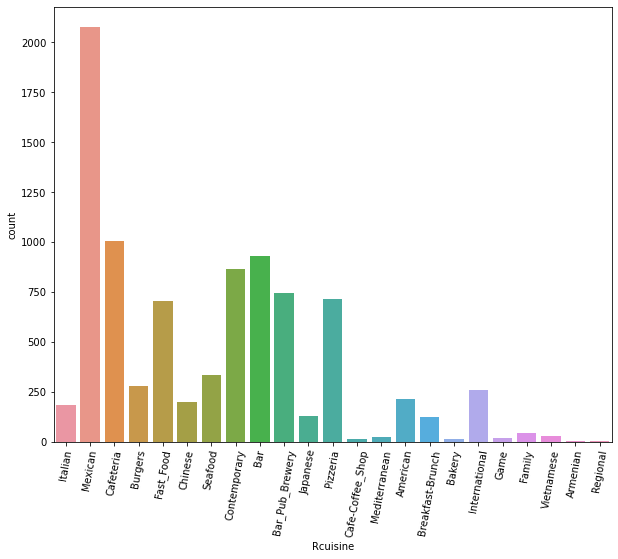

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


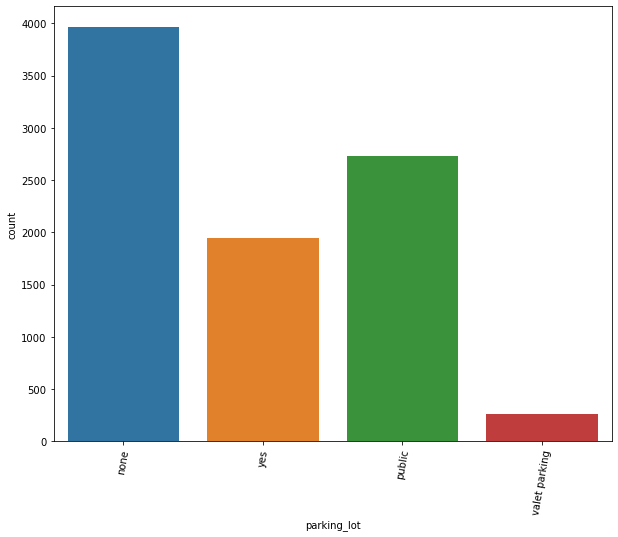

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


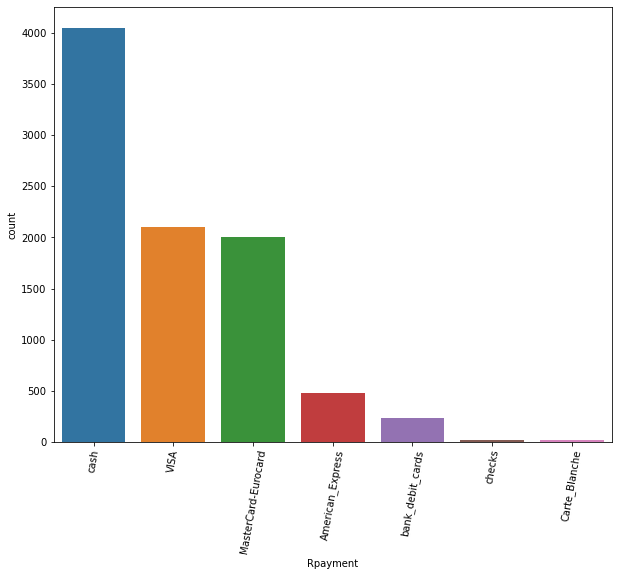

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


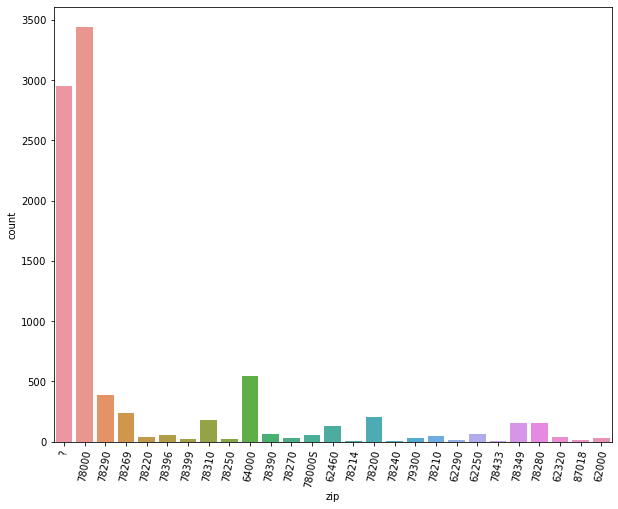

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


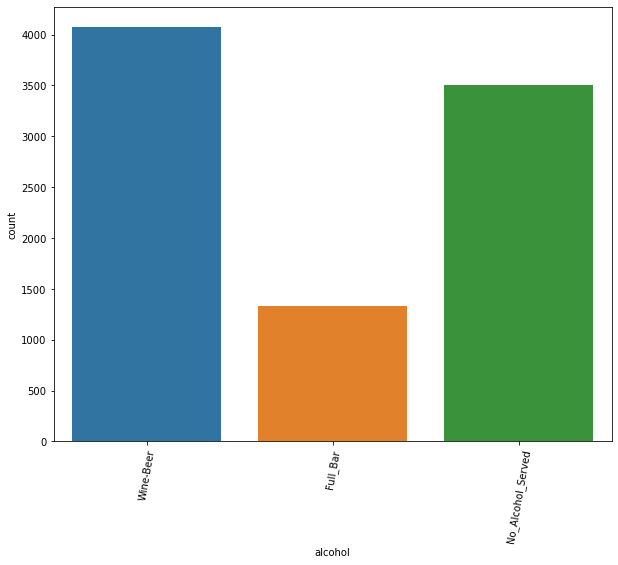

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


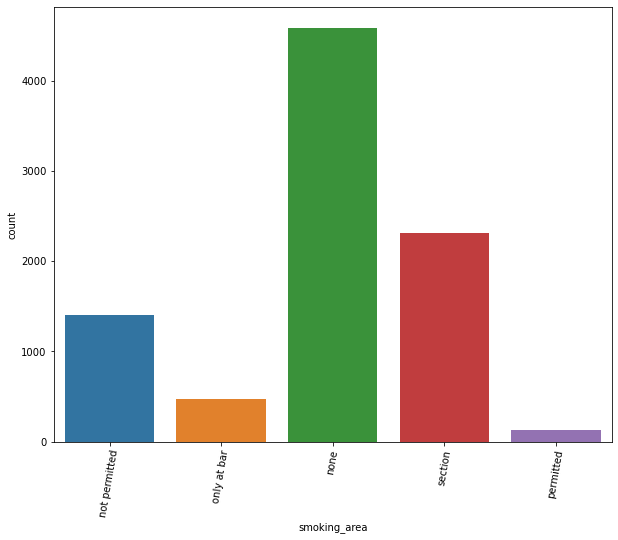

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


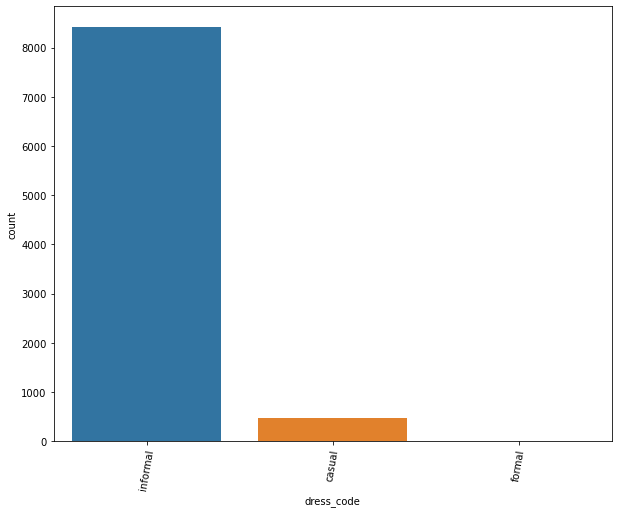

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


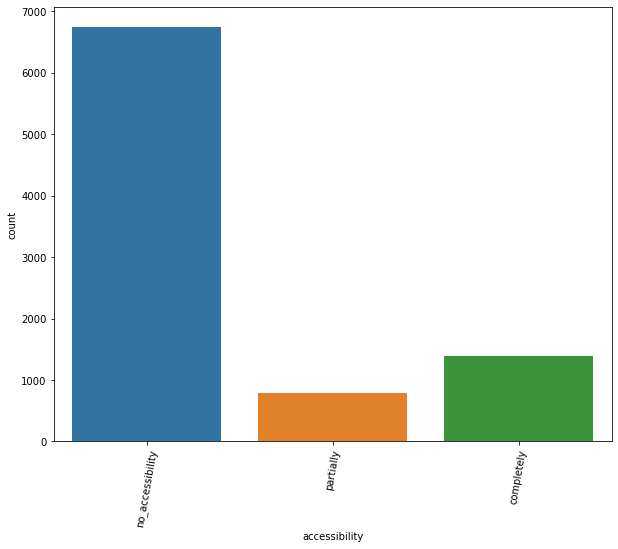

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


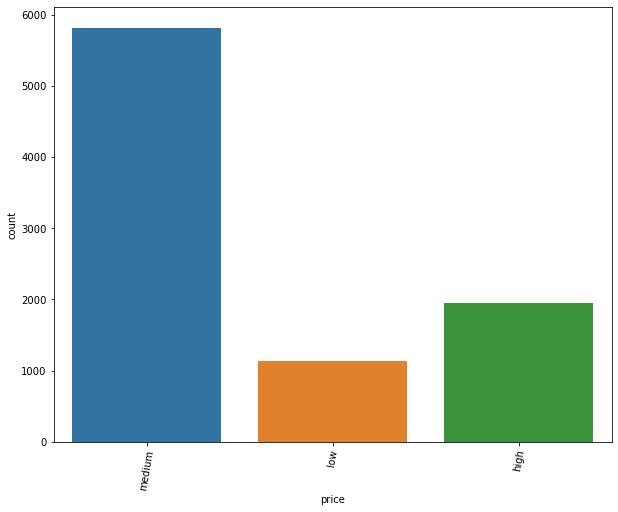

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


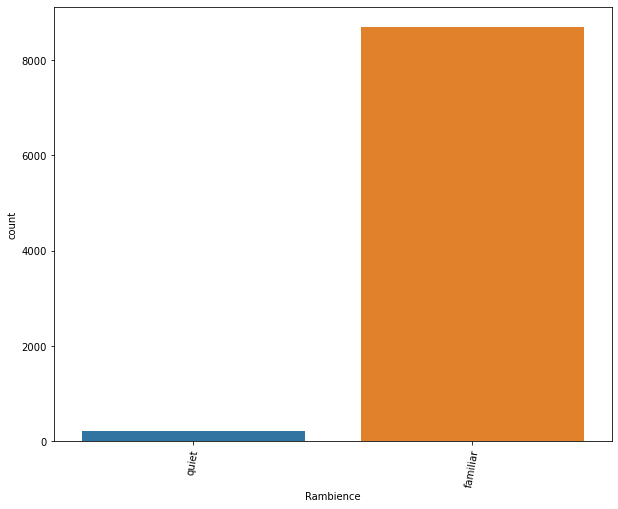

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


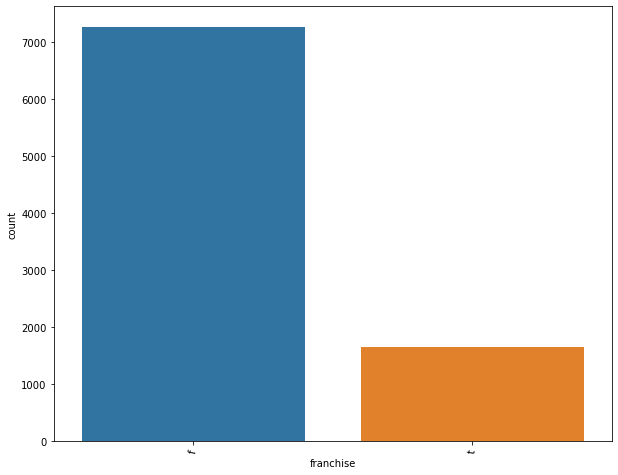

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


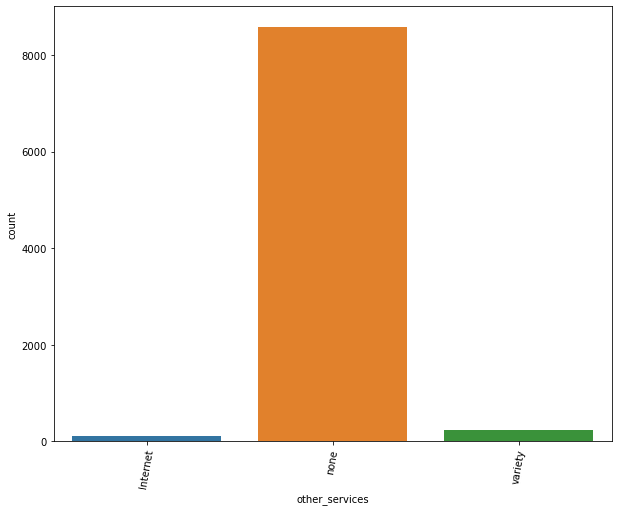

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


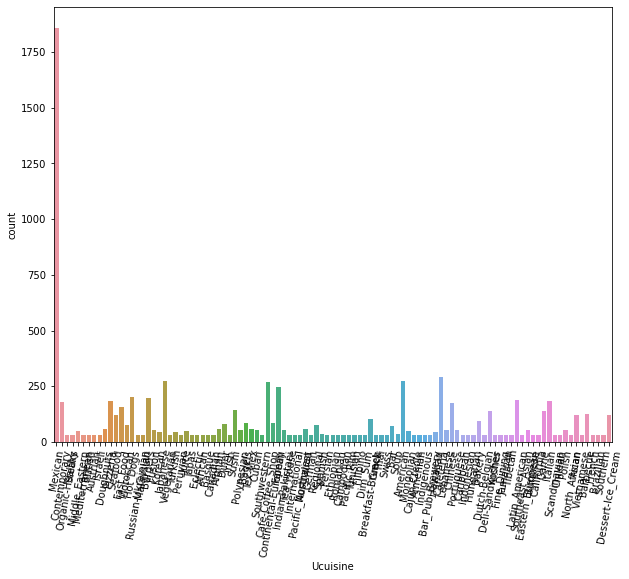

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


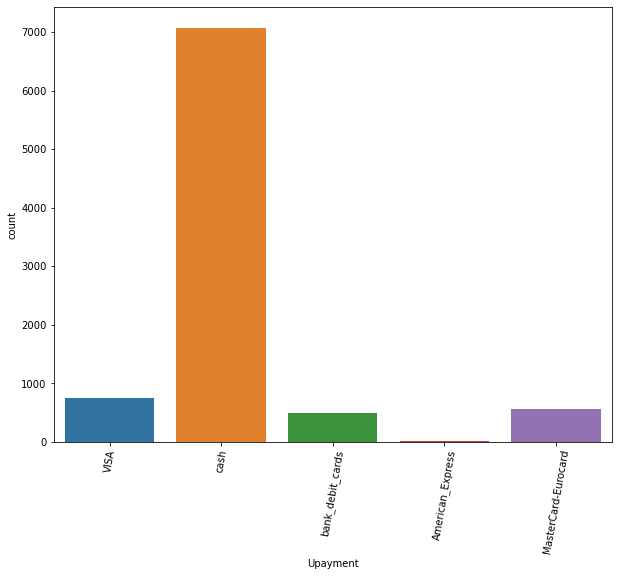

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


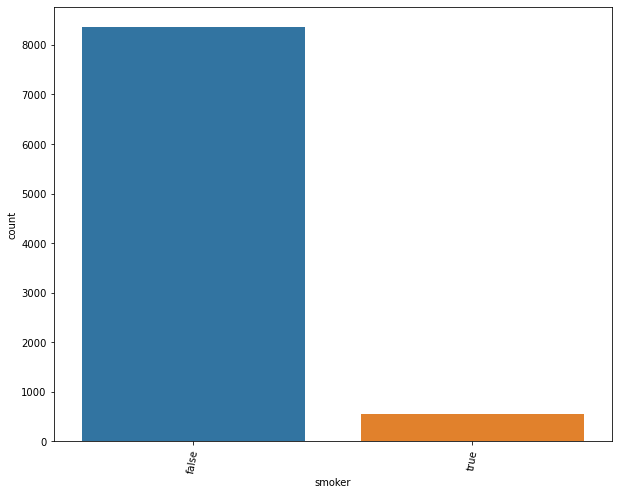

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


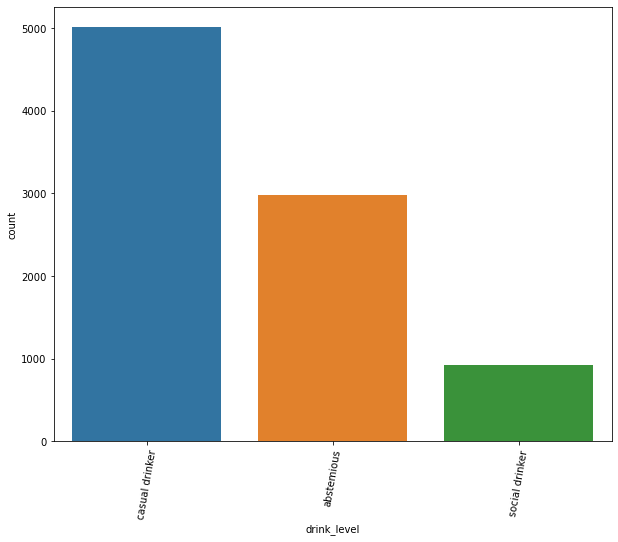

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


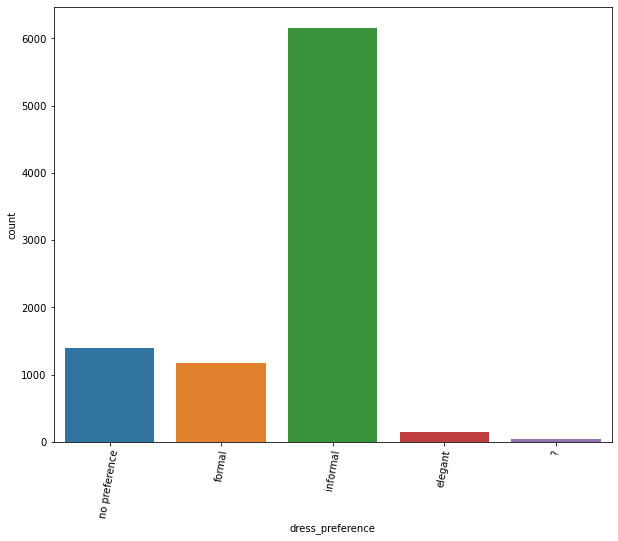

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


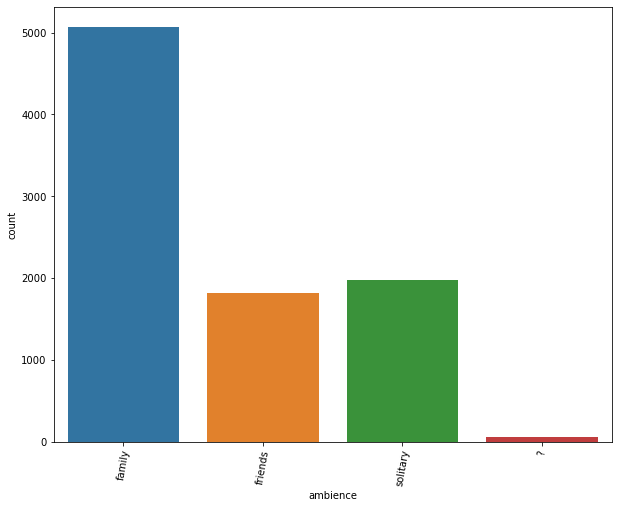

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


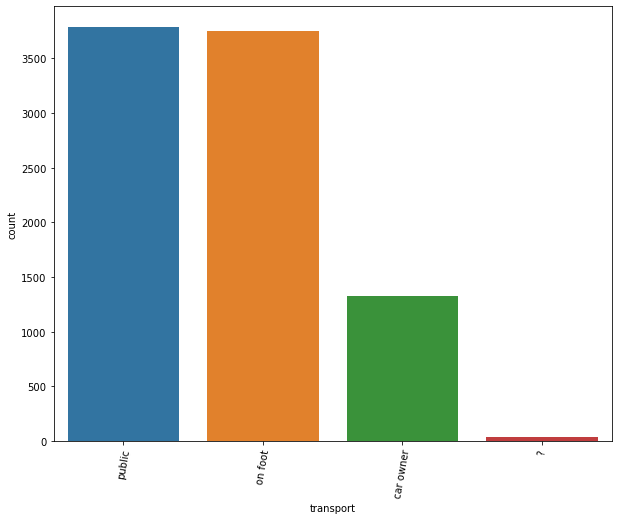

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


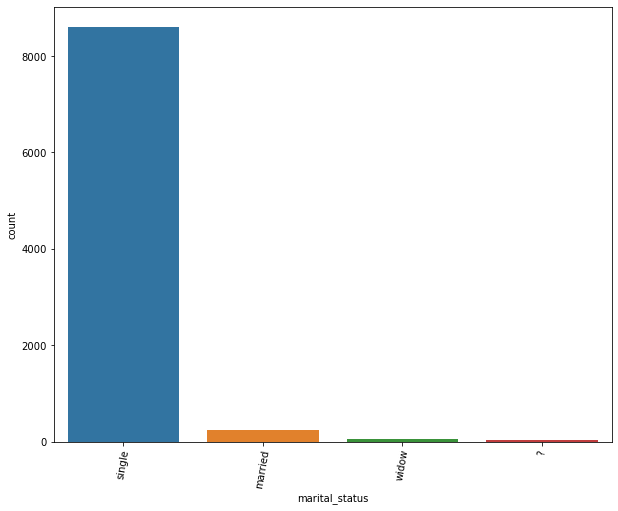

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


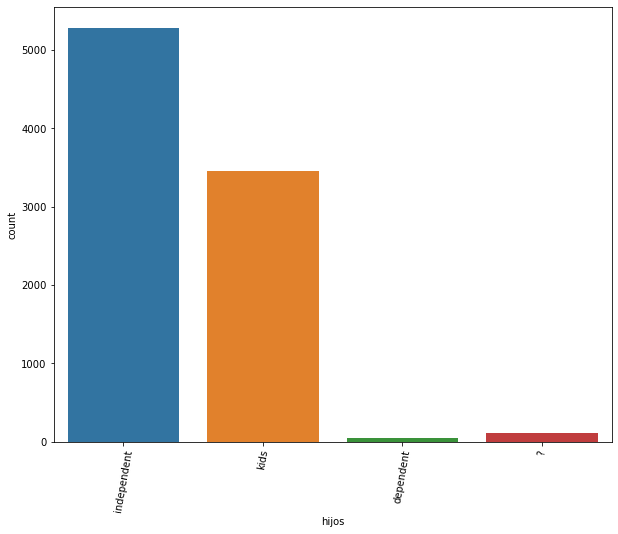

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


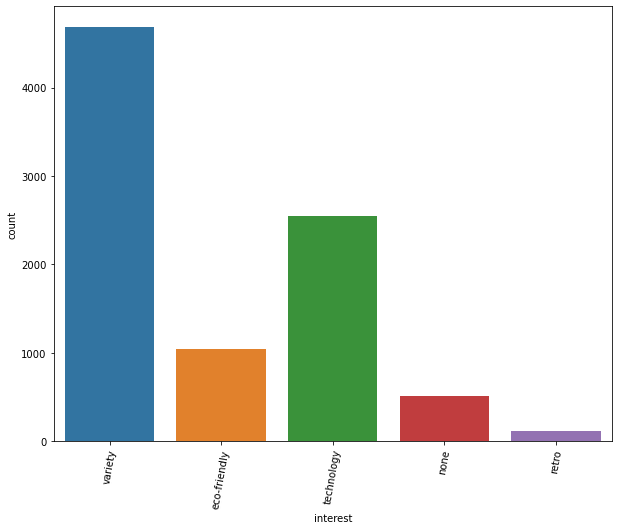

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


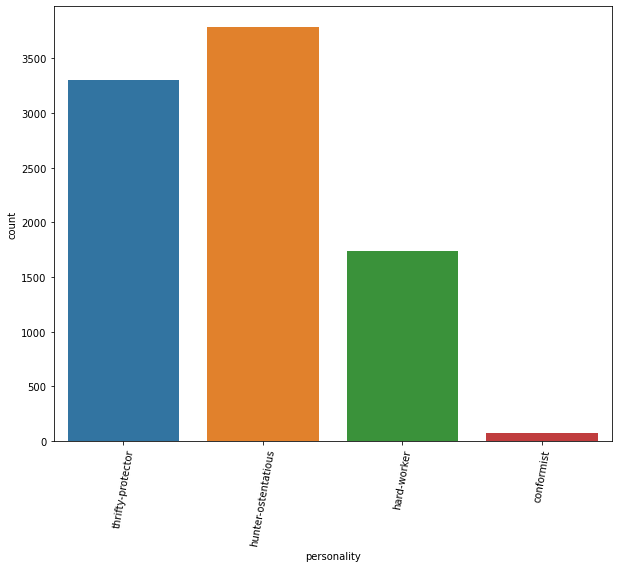

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


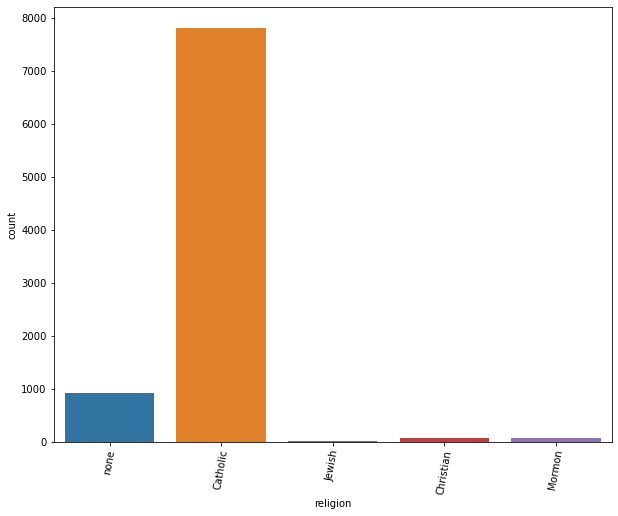

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


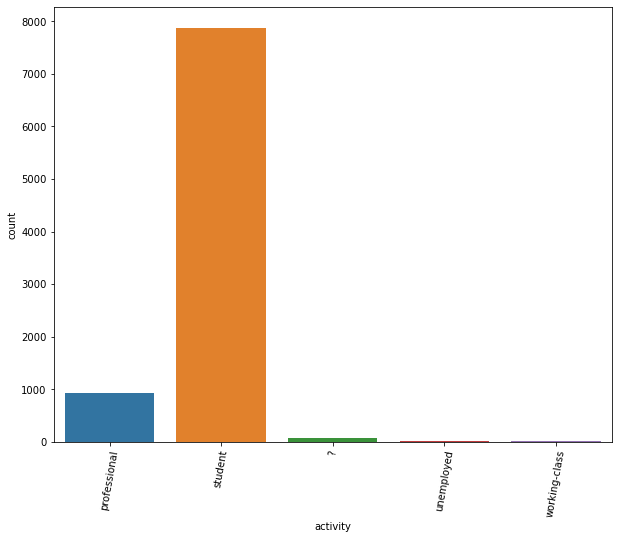

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


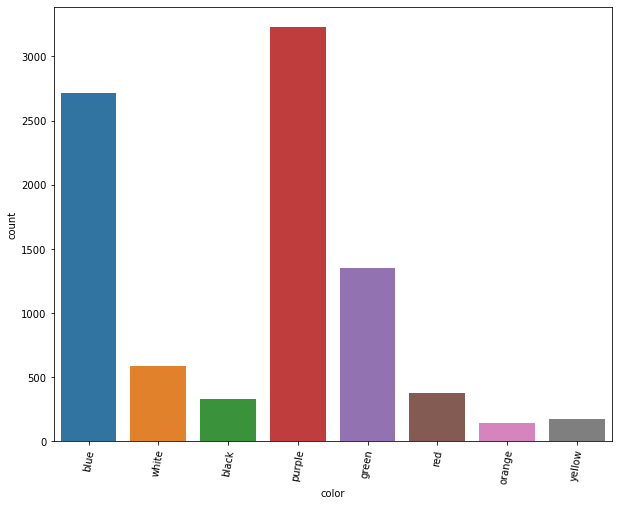

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


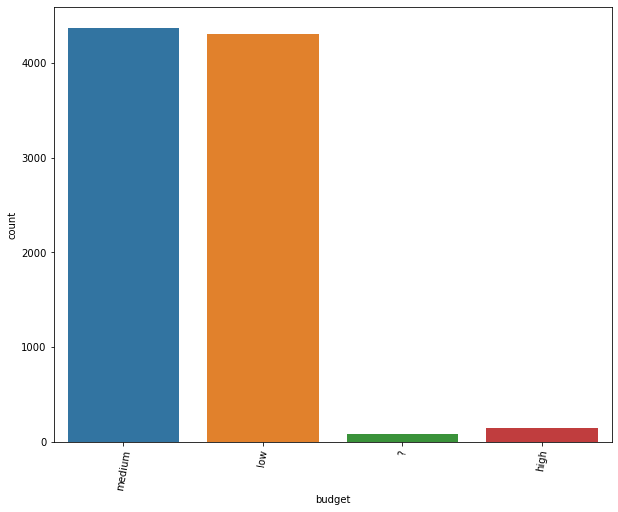

In [51]:
categorical_data=[]
ratings_dummies =pd.DataFrame()
#print(len(housing_new))
#ratings_dummies["BMI"]=ratings["BMI"]
y_r= ratings["rating"]
y_s = ratings["service_rating"]
y_f = ratings["food_rating"]
for ele in ratings.columns:
    if np.dtype(ratings[ele])== "int64" or np.dtype(ratings[ele])=="float64":
        ratings_dummies[ele] = ratings[ele]
    
    else:
        categorical_data.append(ele)
        
        _, ax = plt.subplots(figsize=(10, 8))
        sns.countplot(ratings[ele])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
    plt.show()

In [52]:
ratings_dummies[categorical_data] = ratings[categorical_data]
ratings_dummies.drop(["rating", "food_rating", "service_rating","ctype_cnt","accepts_cnt","Usercuisine_cnt","userpay_cnt"], axis=1, inplace=True)
ratings_dummies

,rating_by_user,rating_by_place,BMI,Rcuisine,parking_lot,Rpayment,zip,alcohol,smoking_area,dress_code,...,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget
0,1.000000,1.0,23.889463,Italian,none,cash,?,Wine-Beer,not permitted,informal,...,family,public,single,independent,variety,thrifty-protector,none,professional,blue,medium
1,1.000000,1.0,23.889463,Italian,none,cash,?,Wine-Beer,not permitted,informal,...,family,public,single,independent,variety,thrifty-protector,none,professional,blue,medium
2,1.666667,1.0,15.241579,Italian,none,cash,?,Wine-Beer,not permitted,informal,...,friends,on foot,single,independent,eco-friendly,hunter-ostentatious,Catholic,professional,white,medium
3,1.666667,1.0,15.241579,Italian,none,cash,?,Wine-Beer,not permitted,informal,...,friends,on foot,single,independent,eco-friendly,hunter-ostentatious,Catholic,professional,white,medium
4,1.666667,1.0,15.241579,Italian,none,cash,?,Wine-Beer,not permitted,informal,...,friends,on foot,single,independent,eco-friendly,hunter-ostentatious,Catholic,professional,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,1.363636,1.0,23.148148,Cafeteria,yes,cash,?,No_Alcohol_Served,not permitted,informal,...,friends,car owner,single,independent,variety,hard-worker,none,student,blue,medium
8903,1.250000,0.5,22.060354,Regional,public,cash,?,No_Alcohol_Served,permitted,informal,...,solitary,public,single,independent,variety,thrifty-protector,Catholic,student,black,medium
8904,0.111111,0.5,22.058051,Regional,public,cash,?,No_Alcohol_Served,permitted,informal,...,friends,public,single,?,variety,hard-worker,Catholic,student,black,medium
8905,1.000000,0.5,30.739417,Regional,public,cash,?,No_Alcohol_Served,permitted,informal,...,family,public,single,independent,technology,thrifty-protector,Christian,student,green,medium


In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()





for ele in categorical_data:
    le.fit(ratings_dummies[ele])
    ratings_dummies[ele] =le.transform(ratings_dummies[ele])
    
    
ratings_dummies

,rating_by_user,rating_by_place,BMI,Rcuisine,parking_lot,Rpayment,zip,alcohol,smoking_area,dress_code,...,ambience,transport,marital_status,hijos,interest,personality,religion,activity,color,budget
0,1.000000,1.0,23.889463,15,0,5,26,2,1,2,...,1,3,2,2,4,3,4,1,1,3
1,1.000000,1.0,23.889463,15,0,5,26,2,1,2,...,1,3,2,2,4,3,4,1,1,3
2,1.666667,1.0,15.241579,15,0,5,26,2,1,2,...,2,2,2,2,0,2,0,1,6,3
3,1.666667,1.0,15.241579,15,0,5,26,2,1,2,...,2,2,2,2,0,2,0,1,6,3
4,1.666667,1.0,15.241579,15,0,5,26,2,1,2,...,2,2,2,2,0,2,0,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,1.363636,1.0,23.148148,8,3,5,26,1,1,2,...,2,1,2,2,4,1,4,2,1,3
8903,1.250000,0.5,22.060354,20,1,5,26,1,3,2,...,3,3,2,2,4,3,0,2,0,3
8904,0.111111,0.5,22.058051,20,1,5,26,1,3,2,...,2,3,2,0,4,1,0,2,0,3
8905,1.000000,0.5,30.739417,20,1,5,26,1,3,2,...,1,3,2,2,3,3,1,2,2,3


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ratings_dummies, y_r, test_size=0.5, random_state=0)

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
#RandomForestClassifier(...)
y_pred = pd.DataFrame(clf.predict(X_test))

In [55]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1699,   72,  133],
       [   0,  753,  283],
       [   0,   99, 1415]])

# Short Cut
- If you have difficulty completing the data merging, you may access the processed data from the files: **features.csv** and **target.csv**.

In [56]:
features = pd.read_csv('features.csv', index_col=0)
target = pd.read_csv('target.csv', index_col=0)
features

,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,interest,personality,religion,...,smoking_area,dress_code,accessibility,price,Rambience,franchise,other_services,parking_lot,Rpayment,Rcuisine
0,1,2,1,1,3,1,3,3,3,0,...,1,2,1,2,0,0,1,1,1.000000,1.000000
1,1,2,1,1,3,1,3,3,3,0,...,4,2,1,2,0,0,1,0,1.000000,1.194731
2,1,2,1,1,3,1,3,3,3,0,...,0,2,0,1,0,0,1,0,1.000000,1.000000
3,1,2,1,1,3,1,3,3,3,0,...,0,2,1,2,0,0,1,0,1.000000,1.000000
4,1,1,3,2,3,2,2,3,3,0,...,1,2,0,2,0,1,2,3,3.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,1,0,4,3,3,2,2,3,1,4,...,0,2,0,1,0,0,1,0,2.164939,1.000000
1157,1,0,4,1,3,2,2,4,1,0,...,0,2,1,1,1,0,1,0,1.000000,1.000000
1158,1,1,3,2,3,2,2,3,3,0,...,1,2,0,2,0,1,1,3,4.000000,1.000000
1159,1,1,3,2,3,2,2,3,3,0,...,1,2,0,1,0,0,1,1,1.000000,1.000000


In [57]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=0)


### Step 11
- Perform a 3-fold `GridSearchCV` on the random forest model, setting the `class_weight = 'balanced'` (4 pts)
- The grid search should cover the following range of hyperparamters:
    - **n_estimators**: 50, 60, 70
    - **max_depth**: 9, 10, 11
    - **max_features**: 1, 2
    - **min_samples_leaf**: 1, 2
    - **min_samples_split**: 2, 3, 4 (10 pts)
- Report the best CV score (3 pts)
- Report the best hyperparameter combination (3 pts)

In [58]:
#### Your answer here
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc=RandomForestClassifier(random_state=0)

In [60]:
param_grid = { 
    'n_estimators': [50, 60,70],
    'max_features': [1,2],
    'max_depth' : [9,10,11],
    "min_samples_leaf": [1,2],
    "min_samples_split":[2,3,4],
    'criterion' :['gini', 'entropy']
}

In [61]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(x_train, y_train)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 10, 11], 'max_features': [1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 60, 70]})

In [62]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 70}

In [63]:
rfc1=RandomForestClassifier(random_state=0,min_samples_leaf =2, min_samples_split =2, max_features=2, n_estimators= 70, max_depth=9, criterion='entropy')
rfc1.fit(x_train, y_train)

/var/folders/04/cszrdrg50q9gqrdnh622flsh0000gn/T/ipykernel_15859/2087660982.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=9, max_features=2,
                       min_samples_leaf=2, n_estimators=70, random_state=0)

In [64]:
from sklearn.metrics import accuracy_score
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.5370051635111877


### Step 12
- Output the sorted feature importance from the best random forest model, as was determined by your grid-search. (4 pts)
- List the top four most important features. (4 pts)
- (Bonus) what's the most important feature your model found? Is it reliable? Why or why not? (5 pts)

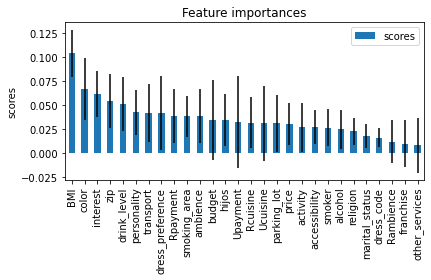

In [65]:
#### Your answer here
importances = rfc1.feature_importances_
feature_names = [f"{i}" for i in list(x_train.columns)]
forest_importances = pd.DataFrame(importances, index=feature_names)
forest_importances.columns=["scores"]
forest_importances.sort_values(by="scores", ascending =False, inplace=True)

std = np.std([tree.feature_importances_ for tree in rfc1.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("scores")
fig.tight_layout()

In [66]:
forest_importances

,scores
BMI,0.104168
color,0.067195
interest,0.062005
zip,0.054416
drink_level,0.051107
personality,0.042629
transport,0.042109
dress_preference,0.041706
Rpayment,0.038602
smoking_area,0.038467


In [67]:
forest_importances.head(4)

,scores
BMI,0.104168
color,0.067195
interest,0.062005
zip,0.054416


In [68]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    rfc1, x_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)
forest_importances = pd.DataFrame(result.importances_mean, index=feature_names)
forest_importances.columns = ["scores"]
forest_importances.sort_values(by="scores", ascending=False, inplace=True)

In [69]:
forest_importances.head(7)

,scores
interest,0.027711
color,0.022031
transport,0.018072
parking_lot,0.016695
drink_level,0.014974
BMI,0.014286
ambience,0.014114
